CODE FOR TASK B

Import necessary libraries & functions for Task B

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import joblib
import shutil

import skimage
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score

print("Step Complete")

Step Complete


Tumour Image Initial Preprocessing

In [2]:
def no_formatting_needed():
    #use this function if pickle file for sorted training dataset TaskB already exists
    #Initialising Parameters for future steps
    base_name = 'TaskB_training_dataset'
    width = 256
    include = {'glioma_tumor', 'meningioma_tumour', 'no_tumour', 'pituitary_tumor'}
    
def no_formatting_needed_testset():
    #use this function if pickle file for sorted test dataset TaskB already exists
    #Initialising Parameters for future steps
    base_name = 'TaskB_test_dataset'
    width = 256
    include = {'glioma_tumor', 'meningioma_tumour', 'no_tumour', 'pituitary_tumor'}
    print("Step Complete")

In [3]:
def formatting_needed():
    #use this function if pickle file for sorted trainig dataset TaskB does not exist (i.e first time of running the code)
    
    #Function to preprocess the tumour images (grayscale, resize, convert to array and storing in pickle file)
    def format_img(src, pklname, include, width=150, height=None):
        """
        function to load images from source, convert to grayscale, resize them and 
        write them as arrays to a dictionary with their respective labels. 
        The dictionary is written to a pickle file.
     
        Parameter
        ---------
        src: str
            path to data
        pklname: str
            path to output file
        width: int
            target width of the image in pixels
        include: set[str]
            set containing str
        """
     
        height = height if height is not None else width
     
        data = dict()
        data['label'] = []
        data['filename'] = []
        data['data'] = []   
     
        pklname = f"{pklname}_{width}x{height}px.pkl"
 
        # read all images in PATH, convert to greyscale, resize and write to destination
        for subdir in os.listdir(src):
            if subdir in include:
                print(subdir)
                current_path = os.path.join(src, subdir)
 
                for file in os.listdir(current_path):
                    if file[-3:] in {'jpg', 'png'}:
                        im = imread(os.path.join(current_path, file), as_gray=True) 
                        im = resize(im, (width, height))
                        data['label'].append(subdir[:-4])
                        data['filename'].append(file)
                        data['data'].append(im)
 
            joblib.dump(data, pklname)
    
    #Sorting the images to four folders
    #Import label.csv file
    data = pd.read_csv('./dataset./label.csv')
    #print(data) #debug line

    #Give the image labels values based on whether there is tumour and what type of tumour
    data.label[data.label == 'no_tumor'] = 0
    data.label[data.label == 'meningioma_tumor'] = 1
    data.label[data.label == 'glioma_tumor'] = 2
    data.label[data.label == 'pituitary_tumor'] = 3
    #print(data.dtypes) #debug line

    #Convert the label data type to integer
    data['label'] = data['label'].astype(str).astype(int)
    #print(data.dtypes) #debug line
    #print(data) #debug line

    #Create four arrays which contain the respective image names  
    no_tumour = []
    meningioma_tumour = []
    glioma_tumor = []
    pituitary_tumor = []

    for i in range(data.shape[0]):
        if data['label'][i] == 0:
            no_tumour.append(data['file_name'][i])
        elif data['label'][i] == 1:
            meningioma_tumour.append(data['file_name'][i])
        elif data['label'][i] == 2:
            glioma_tumor.append(data['file_name'][i])
        else:
            pituitary_tumor.append(data['file_name'][i])

    #print(len(no_tumour)) #debug line
    #print(len(meningioma_tumour)) #debug line
    #print(len(glioma_tumor)) #debug line
    #print(len(pituitary_tumor)) #debug line

    #Create a sorted subfolder to store the sorted images
    os.mkdir(os.path.join("./dataset./image", "TaskB_sortedtrainingdataset"))

    #Create four subfolders in sorted folder
    os.mkdir(os.path.join("./dataset./image/TaskB_sortedtrainingdataset", "no_tumour"))
    os.mkdir(os.path.join("./dataset./image/TaskB_sortedtrainingdataset", "meningioma_tumour"))
    os.mkdir(os.path.join("./dataset./image/TaskB_sortedtrainingdataset", "glioma_tumor"))
    os.mkdir(os.path.join("./dataset./image/TaskB_sortedtrainingdataset", "pituitary_tumor"))

    #Copy the images into the respective subfolders
    src_dir = "./dataset./image"
    dst_dir1 = os.path.join("./dataset./image/TaskB_sortedtrainingdataset", "no_tumour")
    dst_dir2 = os.path.join("./dataset./image/TaskB_sortedtrainingdataset", "meningioma_tumour")
    dst_dir3 = os.path.join("./dataset./image/TaskB_sortedtrainingdataset", "glioma_tumor")
    dst_dir4 = os.path.join("./dataset./image/TaskB_sortedtrainingdataset", "pituitary_tumor")
    data_path = "./dataset./image/TaskB_sortedtrainingdataset"

    for imageName in no_tumour:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir1)

    for imageName in meningioma_tumour:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir2)

    for imageName in glioma_tumor:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir3)

    for imageName in pituitary_tumor:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir4)

    #os.listdir(data_path)  #debug line

    #Initialising Parameters for resize function
    base_name = 'TaskB_training_dataset'
    width = 256
    include = {'glioma_tumor', 'meningioma_tumour', 'no_tumour', 'pituitary_tumor'}
 
    #Create pkl file with resized images resized and converted to arrays
    format_img(src=data_path, pklname=base_name, width=width, include=include)
    print("Step Complete: Training dataset formatted")

In [8]:
def formatting_needed_testset():
    #use this function if pickle file for sorted trainig dataset TaskB does not exist (i.e first time of running the code)
    
    #Function to preprocess the tumour images (grayscale, resize, convert to array and storing in pickle file)
    def format_img(src, pklname, include, width=150, height=None):
        """
        function to load images from source, convert to grayscale, resize them and 
        write them as arrays to a dictionary with their respective labels. 
        The dictionary is written to a pickle file.
     
        Parameter
        ---------
        src: str
            path to data
        pklname: str
            path to output file
        width: int
            target width of the image in pixels
        include: set[str]
            set containing str
        """
     
        height = height if height is not None else width
     
        data = dict()
        data['label'] = []
        data['filename'] = []
        data['data'] = []   
     
        pklname = f"{pklname}_{width}x{height}px.pkl"
 
        # read all images in PATH, convert to greyscale, resize and write to destination
        for subdir in os.listdir(src):
            if subdir in include:
                print(subdir)
                current_path = os.path.join(src, subdir)
 
                for file in os.listdir(current_path):
                    if file[-3:] in {'jpg', 'png'}:
                        im = imread(os.path.join(current_path, file), as_gray=True) 
                        im = resize(im, (width, height))
                        data['label'].append(subdir[:-4])
                        data['filename'].append(file)
                        data['data'].append(im)
 
            joblib.dump(data, pklname)
    
    #Sorting the images to four folders
    #Import label.csv file
    data = pd.read_csv('./test./label.csv')
    #print(data) #debug line

    #Give the image labels values based on whether there is tumour and what type of tumour
    data.label[data.label == 'no_tumor'] = 0
    data.label[data.label == 'meningioma_tumor'] = 1
    data.label[data.label == 'glioma_tumor'] = 2
    data.label[data.label == 'pituitary_tumor'] = 3
    #print(data.dtypes) #debug line

    #Convert the label data type to integer
    data['label'] = data['label'].astype(str).astype(int)
    #print(data.dtypes) #debug line
    #print(data) #debug line

    #Create four arrays which contain the respective image names  
    no_tumour = []
    meningioma_tumour = []
    glioma_tumor = []
    pituitary_tumor = []

    for i in range(data.shape[0]):
        if data['label'][i] == 0:
            no_tumour.append(data['file_name'][i])
        elif data['label'][i] == 1:
            meningioma_tumour.append(data['file_name'][i])
        elif data['label'][i] == 2:
            glioma_tumor.append(data['file_name'][i])
        else:
            pituitary_tumor.append(data['file_name'][i])

    #print(len(no_tumour)) #debug line
    #print(len(meningioma_tumour)) #debug line
    #print(len(glioma_tumor)) #debug line
    #print(len(pituitary_tumor)) #debug line

    #Create a sorted subfolder to store the sorted images
    os.mkdir(os.path.join("./test./image", "TaskB_sortedtestdataset"))

    #Create four subfolders in sorted folder
    os.mkdir(os.path.join("./test./image/TaskB_sortedtestdataset", "no_tumour"))
    os.mkdir(os.path.join("./test./image/TaskB_sortedtestdataset", "meningioma_tumour"))
    os.mkdir(os.path.join("./test./image/TaskB_sortedtestdataset", "glioma_tumor"))
    os.mkdir(os.path.join("./test./image/TaskB_sortedtestdataset", "pituitary_tumor"))

    #Copy the images into the respective subfolders
    src_dir = "./test./image"
    dst_dir1 = os.path.join("./test./image/TaskB_sortedtestdataset", "no_tumour")
    dst_dir2 = os.path.join("./test./image/TaskB_sortedtestdataset", "meningioma_tumour")
    dst_dir3 = os.path.join("./test./image/TaskB_sortedtestdataset", "glioma_tumor")
    dst_dir4 = os.path.join("./test./image/TaskB_sortedtestdataset", "pituitary_tumor")
    data_path = "./test./image/TaskB_sortedtestdataset"

    for imageName in no_tumour:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir1)

    for imageName in meningioma_tumour:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir2)

    for imageName in glioma_tumor:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir3)

    for imageName in pituitary_tumor:
        shutil.copy(os.path.join(src_dir, imageName), dst_dir4)

    #os.listdir(data_path)  #debug line

    #Initialising Parameters for resize function
    base_name = 'TaskB_test_dataset'
    width = 256
    include = {'glioma_tumor', 'meningioma_tumour', 'no_tumour', 'pituitary_tumor'}
 
    #Create pkl file with resized images resized and converted to arrays
    format_img(src=data_path, pklname=base_name, width=width, include=include)
    print("Step Complete: Test dataset formatted")

In [11]:
image_formatting=input("Does a pickle file containing the sorted training data exist?(Please enter N in captial if running code for first time and Y in capital for subsequent runs) ")

if image_formatting == "Y":
    no_formatting_needed()
    no_formatting_needed_testset()
elif image_formatting == "N":
    formatting_needed()
    formatting_needed_testset()
else:
    print("Incorrect input! Please run cell again and input either Y or N")

Does a pickle file containing the sorted training data exist?(Please enter N in captial if running code for first time and Y in capital for subsequent runs) N
glioma_tumor
meningioma_tumour
no_tumour
pituitary_tumor
Step Complete: Training dataset formatted
glioma_tumor
meningioma_tumour
no_tumour
pituitary_tumor
Step Complete: Test dataset formatted


Load the pickle file

In [12]:
#Initialising Parameters for resize function
base_name = 'TaskB_training_dataset'
width = 256
include = {'glioma_tumor', 'meningioma_tumour', 'no_tumour', 'pituitary_tumor'}

#Load pickle data file
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')

#some information about the data
print('Training dataset')
print('number of samples: ', len(data['data']))
print('image resolution: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))

#Initialising some parameters
base_name = 'TaskB_test_dataset'
width = 256
include = {'glioma_tumor', 'meningioma_tumour', 'no_tumour', 'pituitary_tumor'}

#Load pickle file
data_test = joblib.load(f'{base_name}_{width}x{width}px.pkl')

#some information about the data
print('')
print('Test dataset')
print('number of samples: ', len(data_test['data']))
print('image resolution: ', data_test['data'][0].shape)
print('labels:', np.unique(data_test['label']))

print("Step Complete")

Training dataset
number of samples:  3000
image resolution:  (256, 256)
labels: ['glioma_t' 'meningioma_tu' 'no_tu' 'pituitary_t']

Test dataset
number of samples:  200
image resolution:  (256, 256)
labels: ['glioma_t' 'meningioma_tu' 'no_tu' 'pituitary_t']
Step Complete


Split the data to training and validation set

In [17]:
#Extract the X and y values from data
X = np.array(data['data'])
y = np.array(data['label'])

#Split data to train and test (75% train, 25% split)
X_train, X_validate, y_train, y_validate = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    shuffle=True,
    random_state=42,
)

#Extract the X and y values from the test data
X_test = np.array(data_test['data'])
y_test = np.array(data_test['label'])

print("Step Complete")

Step Complete


Define the HOG transformer class

In [14]:
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (greyscale or 1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])
        
print("Step Complete")

Step Complete


Prepare training and validation data

In [15]:
# create an instance of each transformer
hogify = HogTransformer(
    #change parameters below for optimisation
    pixels_per_cell=(12, 12), 
    cells_per_block=(3, 3), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_hog = hogify.fit_transform(X_train)
X_train_prepared = scalify.fit_transform(X_train_hog)

#print(X_train.shape) #debug line
#print(X_train_prepared.shape) #debug line

#transform validation data
X_validate_hog = hogify.transform(X_validate)
X_validate_prepared = scalify.transform(X_validate_hog)

#print(X_validate_prepared.shape)  #debug line

#transform test data
X_test_hog = hogify.transform(X_test)
X_test_prepared = scalify.transform(X_test_hog)
print(X_test_prepared.shape) #debug line
print("Step Complete")

(200, 29241)
Step Complete


SVM with SGD optimisation

In [18]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3, verbose=1, learning_rate='optimal', alpha=0.0001)

#Fit the data
sgd_clf.fit(X_train_prepared, y_train)

#Validate the data
y_pred = sgd_clf.predict(X_validate_prepared)
#print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_validate)/len(y_validate))
cmx = confusion_matrix(y_validate, y_pred, labels=["no_tu","glioma_t","meningioma_tu","pituitary_t"])
print(cmx)
print('')

#Run the classifier with test data
y_pred_test = sgd_clf.predict(X_test_prepared)
#print(np.array(y_pred_test == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred_test == y_test)/len(y_test))
cmx = confusion_matrix(y_test, y_pred_test, labels=["no_tu","glioma_t","meningioma_tu","pituitary_t"])
print(cmx)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9235.61, NNZs: 29241, Bias: -2169.626376, T: 2250, Avg. loss: 10458.018704
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 6453.91, NNZs: 29241, Bias: -2517.409860, T: 4500, Avg. loss: 1607.843452
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 4975.94, NNZs: 29241, Bias: -2609.407806, T: 6750, Avg. loss: 360.654235
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 4068.70, NNZs: 29241, Bias: -2677.482173, T: 9000, Avg. loss: 199.681065
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 3429.85, NNZs: 29241, Bias: -2700.633037, T: 11250, Avg. loss: 69.560479
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 2937.42, NNZs: 29241, Bias: -2708.796401, T: 13500, Avg. loss: 35.903403
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 2576.82, NNZs: 29241, Bias: -2707.579520, T: 15750, Avg. loss: 21.459965
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 2290.86, NNZs: 29241, Bias: -2709.184235, T: 18000, Avg. loss: 7.378538
Total training time: 0.63 seconds

Norm: 1738.89, NNZs: 29241, Bias: -2625.067114, T: 20250, Avg. loss: 1.101433
Total training time: 0.68 seconds.
-- Epoch 10
Norm: 1575.58, NNZs: 29241, Bias: -2626.032086, T: 22500, Avg. loss: 1.622877
Total training time: 0.75 seconds.
-- Epoch 11
Norm: 1441.49, NNZs: 29241, Bias: -2626.428888, T: 24750, Avg. loss: 0.385372
Total training time: 0.82 seconds.
-- Epoch 12
Norm: 1327.54, NNZs: 29241, Bias: -2626.071451, T: 27000, Avg. loss: 0.166590
Total training time: 0.89 seconds.
-- Epoch 13
Norm: 1229.02, NNZs: 29241, Bias: -2626.421101, T: 29250, Avg. loss: 0.080034
Total training time: 0.97 seconds.
-- Epoch 14
Norm: 1143.93, NNZs: 29241, Bias: -2626.421101, T: 31500, Avg. loss: 0.000000
Total training time: 1.04 seconds.
-- Epoch 15
Norm: 1069.86, NNZs: 29241, Bias: -2626.421101, T: 33750, Avg. loss: 0.000000
Total training time: 1.11 seconds.
-- Epoch 16
Norm: 1004.80, NNZs: 29241, Bias: -2626.421101, T: 36000, Avg. loss: 0.000000
Total training time: 1.18 seconds.
-- Epoch 17


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.7s finished


K-Nearest Neighbours Method

For k = 1
Percentage correct:  93.6
confusion matrix is:
[[ 94   2   3  11]
 [  5 217  10   0]
 [  5   4 190   5]
 [  1   0   2 201]]

For k = 2
Percentage correct:  93.6
confusion matrix is:
[[ 94   2   3  11]
 [  5 217  10   0]
 [  5   4 190   5]
 [  1   0   2 201]]

For k = 3
Percentage correct:  90.53333333333333
confusion matrix is:
[[ 94   2   4  10]
 [ 10 206  14   2]
 [  5   8 177  14]
 [  1   1   0 202]]

For k = 4
Percentage correct:  91.2
confusion matrix is:
[[ 93   2   5  10]
 [ 10 209  10   3]
 [  5   6 180  13]
 [  1   1   0 202]]

For k = 5
Percentage correct:  87.33333333333333
confusion matrix is:
[[ 93   3   4  10]
 [ 11 194  22   5]
 [  5  10 166  23]
 [  1   1   0 202]]

For k = 6
Percentage correct:  87.33333333333333
confusion matrix is:
[[ 88   5   5  12]
 [ 11 200  16   5]
 [  5   9 168  22]
 [  2   3   0 199]]

For k = 7
Percentage correct:  85.6
confusion matrix is:
[[ 90   5   3  12]
 [ 12 194  19   7]
 [  6  13 159  26]
 [  2   3   0 199]]

For k = 8
Percen

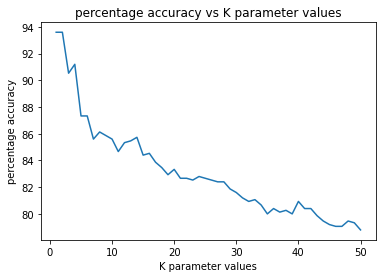

Running the classifier with test data
For k = 21
Percentage correct:  81.0
confusion matrix is:
[[30  1  0  6]
 [ 2 33  5  3]
 [ 4  7 48  9]
 [ 0  1  0 51]]



In [20]:
def KNNClassifier(X_train, y_train, X_test,k):

    #Create KNN object
    neigh = KNeighborsClassifier(n_neighbors=k,weights='distance',p=2)
    neigh.fit(X_train, y_train) # Fit KNN model

    y_pred_knn = neigh.predict(X_test)
    return y_pred_knn

precentage = np.zeros(50)

#print(X_train_prepared.shape) #debug line
#print(X_test_prepared.shape) #debug line

for i in range(1,51):
    y_pred_knn=KNNClassifier(X_train_prepared, y_train, X_validate_prepared,i)
    print('For k =', i)
    precentage[i-1]=100*np.sum(y_pred_knn == y_validate)/len(y_validate)
    print('Percentage correct: ', precentage[i-1])
    cmx_knn = confusion_matrix(y_validate, y_pred_knn, labels=["no_tu","glioma_t","meningioma_tu","pituitary_t"])
    print('confusion matrix is:')
    print(cmx_knn)
    print('')
    
#plot the accuracy of K
K_values = np.linspace(1, 50, num=50)
plt.plot(K_values,precentage)
plt.xlabel("K parameter values")
plt.ylabel("percentage accuracy")
plt.title("percentage accuracy vs K parameter values")
plt.show()

print('Running the classifier with test data')
y_pred_knn_test=KNNClassifier(X_train_prepared, y_train, X_test_prepared,24)
print('For k = 21')
print('Percentage correct: ', 100*np.sum(y_pred_knn_test == y_test)/len(y_test))
cmx_knn = confusion_matrix(y_test, y_pred_knn_test, labels=["no_tu","glioma_t","meningioma_tu","pituitary_t"])
print('confusion matrix is:')
print(cmx_knn)
print('')

Decision Trees


Minimum samples for split: 2
Prediction accuracy (%):  72.13333333333334
14
[[ 78   8  21   3]
 [ 13 166  45   8]
 [ 13  45 132  14]
 [ 13  14  12 165]]


Minimum samples for split: 5
Prediction accuracy (%):  72.53333333333333
14
[[ 79  10  15   6]
 [ 14 167  45   6]
 [ 12  41 139  12]
 [ 16  13  16 159]]


Minimum samples for split: 10
Prediction accuracy (%):  72.13333333333334
14
[[ 77   9  17   7]
 [ 14 164  47   7]
 [ 13  37 140  14]
 [ 13  18  13 160]]


Minimum samples for split: 15
Prediction accuracy (%):  71.06666666666666
13
[[ 75  10  18   7]
 [ 15 164  46   7]
 [ 11  41 138  14]
 [ 14  16  18 156]]


Minimum samples for split: 20
Prediction accuracy (%):  71.2
13
[[ 75  10  20   5]
 [ 15 165  45   7]
 [ 10  40 138  16]
 [ 14  17  17 156]]


Minimum samples for split: 25
Prediction accuracy (%):  69.33333333333333
13
[[ 76   9  20   5]
 [ 14 160  52   6]
 [ 14  41 136  13]
 [ 21  20  15 148]]


Minimum samples for split: 30
Prediction accuracy (%):  68.93333333333334
13
[

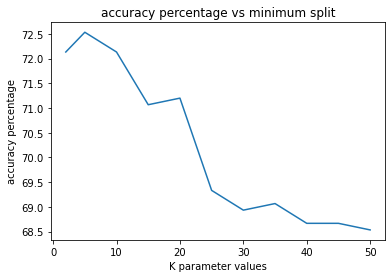

Running the classifier with test data

Minimum samples for split: 2
Prediction accuracy (%):  69.0
14
[[24  5  3  5]
 [ 2 31  9  1]
 [ 3 13 43  9]
 [ 3  2  7 40]]



In [21]:
split_params = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

accuracy_tree = np.zeros(11)
index = 0

for i in split_params:
    tree_params={
        'criterion': 'entropy',
        'min_samples_split':i
    }
    clf_tree = tree.DecisionTreeClassifier(**tree_params)
    clf_tree.fit(X_train_prepared, y_train)
    
    #print(X_train_prepared.shape) #debug line
    #print(X_validate_prepared.shape) #debug line
    #print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf_tree.predict(X_train_prepared)))
    #print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf_tree.predict(X_validate_prepared)))

    y_pred_tree = clf_tree.predict(X_validate_prepared)
    #print(np.array(y_pred_tree == y_test)[:25])
    print('')
    print("Minimum samples for split:", i)
    accuracy_tree[index]=100*np.sum(y_pred_tree == y_validate)/len(y_validate)
    print('Prediction accuracy (%): ', accuracy_tree[index])
    index = index+1
    print(clf_tree.get_depth())

    cmx_tree = confusion_matrix(y_validate, y_pred_tree, labels=["no_tu","glioma_t","meningioma_tu","pituitary_t"])
    print(cmx_tree)
    print('')
    
#plot the accuracy vs minimum split
plt.plot(split_params,accuracy_tree)
plt.xlabel("K parameter values")
plt.ylabel("accuracy percentage")
plt.title("accuracy percentage vs minimum split")
plt.show()

print('Running the classifier with test data')
tree_params={
    'criterion': 'entropy',
    'min_samples_split':2
    }
clf_tree = tree.DecisionTreeClassifier(**tree_params)
clf_tree.fit(X_train_prepared, y_train)
y_pred_tree_test = clf_tree.predict(X_test_prepared)
print('')
print("Minimum samples for split: 2")
print('Prediction accuracy (%): ', 100*np.sum(y_pred_tree_test == y_test)/len(y_test))
print(clf_tree.get_depth())
cmx_tree = confusion_matrix(y_test, y_pred_tree_test, labels=["no_tu","glioma_t","meningioma_tu","pituitary_t"])
print(cmx_tree)
print('')